# Introduction to Newton's (Newton-Raphson) method

*[Written by: Maxime Pierre, 2023]* \
Newton's method is one of the most common methods for solving nonlinear equations numerically. \
In this notebook, we will introduce the method and implement it to solve a simple one-dimensional example. \
\
For instance, let us consider the following nonlinear equation:
$$ x\in\mathbb{R} : \cos(x)=x^3 $$
Finding the solution to this equation amounts to finding the zero of the following function:
$$ f : x \rightarrow \cos(x)-x^3 $$
Let us plot this function first.

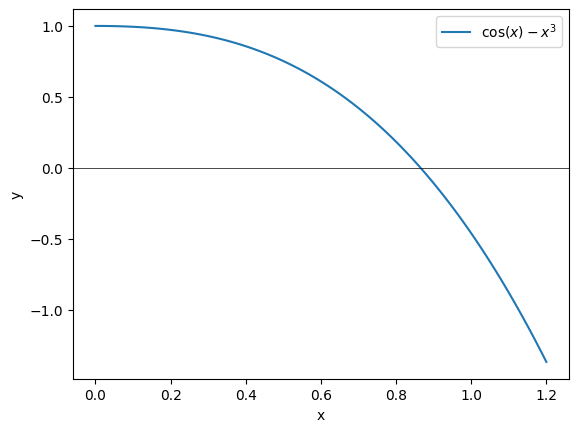

In [15]:
import numpy as np
import matplotlib.pyplot as plt


def f(x):
    return np.cos(x) - x**3


# Plot bounds
x_inf = 0
x_sup = 1.2

X = np.linspace(x_inf, x_sup, 100)

fig = plt.figure()
gc = fig.gca()
gc.plot(X, f(X), label=r"$\cos(x)-x^3$")
gc.legend()
gc.set_xlabel(r"x")
gc.set_ylabel(r"y")
gc.axhline(0, color="black", linewidth=0.5)

As we can see, $f$ has a zero for a value of $x$ close to $0.9$, but we want to get a precise approximation of our solution. \
The idea behind Newton's method is to use the derivative of $f$ to get a sequence of values $x_0, x_1, \dots, x_n$ which converges towards the solution $\hat{x}$ such that $f(\hat{x})=0$. \
$f$ is easily derivable and we have:
$$ f': x \rightarrow -\sin(x)-3x^2. $$
We have to start with an initial guess of the solution: let us say $x_0=0.5$. We will draw the tangent line to the graph of $f$ at $f(x_0)$, which has equation:
$$ t_0 : x \rightarrow f(x_0) + f'(x_0)(x-x_0). $$
This tangent line intersects with the $x$-axis at $x_1$, such that:
$$ f(x_0) + f'(x_0)(x_1-x_0) = 0, $$
which gives us:
$$ x_1 = x_0 - \frac{f(x_0)}{f'(x_0)} $$

Value of x_1: 1.1121416370972725 



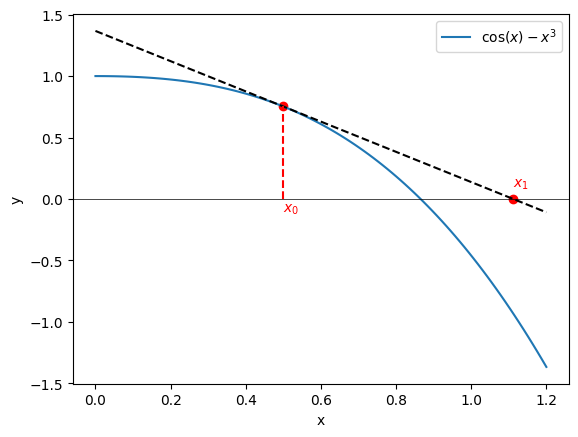

In [16]:
x_0 = 0.5


def f_prime(x):
    return -np.sin(x) - 3 * x**2


x_1 = x_0 - f(x_0) / f_prime(x_0)

gc.plot(
    [x_inf, x_sup],
    [f(x_0) + f_prime(x_0) * (x_inf - x_0), f(x_0) + f_prime(x_0) * (x_sup - x_0)],
    "k--",
)  # t_0 tangent
gc.scatter([x_0, x_1], [f(x_0), 0], c="r")
gc.plot([x_0, x_0], [0, f(x_0)], "r--")  # x_0 projection
gc.annotate(r"$x_0$", (x_0, -0.1), c="r")
gc.annotate(r"$x_1$", (x_1, 0.1), c="r")

print("Value of x_1:", x_1, "\n")
fig

The first iteration gives us a new point $x_1$ closer to $\hat{x}$. The idea now is to iterate to get closer and closer to the solution. \
The next value $x_2$ is determined from $x_1$ in the same way $x_1$ is determined from $x_0$:
$$ x_2 = x_1 - \frac{f(x_1)}{f'(x_1)}. $$

Let us draw the new tangent $t_1$.

Value of x_2: 0.9096726937368068 



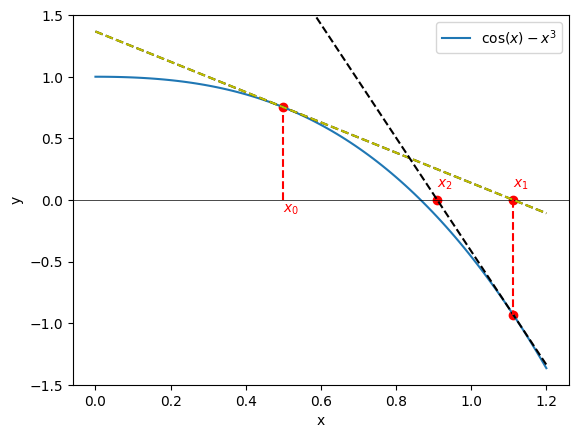

In [17]:
x_2 = x_1 - f(x_1) / f_prime(x_1)

gc.plot(
    [x_inf, x_sup],
    [f(x_0) + f_prime(x_0) * (x_inf - x_0), f(x_0) + f_prime(x_0) * (x_sup - x_0)],
    "y--",
)
gc.plot(
    [x_inf, x_sup],
    [f(x_1) + f_prime(x_1) * (x_inf - x_1), f(x_1) + f_prime(x_1) * (x_sup - x_1)],
    "k--",
)  # t_1 tangent
gc.scatter([x_1, x_2], [f(x_1), 0], c="r")
gc.plot([x_1, x_1], [0, f(x_1)], "r--")  # x_1 projection
gc.annotate(r"$x_2$", (x_2, 0.1), c="r")
gc.set_ylim(-1.5, 1.5)

print("Value of x_2:", x_2, "\n")
fig

We are closing in on the solution. Now, we will automatically iterate until we reach a certain precision. \
Given a current value $x_n$, $x_{n+1}$ is still determined in the same way:
$$ x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}. $$

We also need a stopping condition. With $\varepsilon > 0$ an arbitrary precision, we will iterate **while** $\lvert f(x_n) \rvert > \varepsilon$.


In [18]:
eps = 1e-12  # Precision


def NewtonMethod(function, derivative, initial_guess, tolerance, max_iteration=20):
    x_n = initial_guess
    x = [initial_guess]
    iteration = 0
    while abs(f(x_n)) > eps and iteration < max_iteration:
        x_n -= function(x_n) / derivative(x_n)
        x.append(x_n)
        iteration += 1
        print(
            "Iteration {}: x_{} = {}, f(x_{}) = {}".format(
                iteration, iteration, x_n, iteration, function(x_n)
            )
        )
    if abs(f(x_n)) > eps:  # Not converged
        print("Did not converge after {} iterations.".format(iteration))
    else:  # Converged
        print("Converged in {} iterations.".format(iteration))
    return x


result = NewtonMethod(f, f_prime, x_0, eps)

Iteration 1: x_1 = 1.1121416370972725, f(x_1) = -0.9328201795040985
Iteration 2: x_2 = 0.9096726937368068, f(x_2) = -0.13875403935061048
Iteration 3: x_3 = 0.8672638182088165, f(x_3) = -0.005393998041341219
Iteration 4: x_4 = 0.8654771352982646, f(x_4) = -9.333106352094056e-06
Iteration 5: x_5 = 0.8654740331109566, f(x_5) = -2.8106184046805538e-11
Iteration 6: x_6 = 0.8654740331016144, f(x_6) = 1.1102230246251565e-16
Converged in 6 iterations.


You can now try the algorithm on other functions if you'd like!

# Bonus: Sensitivity to initial guess and non-convergence

Newton's method is not guaranteed to always converge towards the solution (which is why we introduced a maximum number of iterations in our `NewtonMethod` function!). In particular, the choice of the initial guess $x_0$ can have a huge influence on the algorithm if the function is not regular enough. \
Let us illustrate that with an example. Consider the following function:
$$ f : x \rightarrow x^3-2x+2. $$
Let us apply Newton's method with an initial guess of -1.

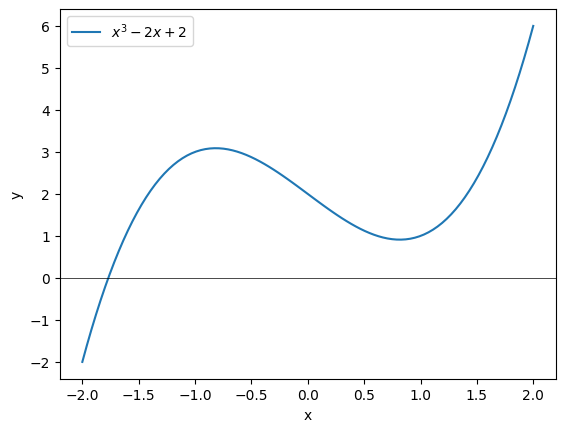

Iteration 1: x_1 = -4.0, f(x_1) = -54.0
Iteration 2: x_2 = -2.8260869565217392, f(x_2) = -14.919125503410868
Iteration 3: x_3 = -2.1467190137392356, f(x_3) = -3.5995072936479247
Iteration 4: x_4 = -1.8423262771400926, f(x_4) = -0.5685088618057428
Iteration 5: x_5 = -1.7728476364392378, f(x_5) = -0.02634488978133742
Iteration 6: x_6 = -1.7693013974364495, f(x_6) = -6.68403939361184e-05
Iteration 7: x_7 = -1.7692923542973595, f(x_7) = -4.340705572758452e-10
Iteration 8: x_8 = -1.7692923542386314, f(x_8) = 0.0
Converged in 8 iterations.


In [20]:
def f(x):
    return x**3 - 2 * x + 2


def f_prime(x):
    return 3 * x**2 - 2


x_0 = -1
eps = 1e-12

X = np.linspace(-2, 2, 100)
plt.figure()
plt.plot(X, f(X), label=r"$x^3-2x+2$")
plt.legend()
plt.xlabel(r"x")
plt.ylabel(r"y")
plt.axhline(0, color="black", linewidth=0.5)
plt.show()

result = NewtonMethod(f, f_prime, x_0, eps)

The convergence is easy. Let us now try with an initial guess of 0.

In [21]:
x_0 = 0
result = NewtonMethod(f, f_prime, x_0, eps)

Iteration 1: x_1 = 1.0, f(x_1) = 1.0
Iteration 2: x_2 = 0.0, f(x_2) = 2.0
Iteration 3: x_3 = 1.0, f(x_3) = 1.0
Iteration 4: x_4 = 0.0, f(x_4) = 2.0
Iteration 5: x_5 = 1.0, f(x_5) = 1.0
Iteration 6: x_6 = 0.0, f(x_6) = 2.0
Iteration 7: x_7 = 1.0, f(x_7) = 1.0
Iteration 8: x_8 = 0.0, f(x_8) = 2.0
Iteration 9: x_9 = 1.0, f(x_9) = 1.0
Iteration 10: x_10 = 0.0, f(x_10) = 2.0
Iteration 11: x_11 = 1.0, f(x_11) = 1.0
Iteration 12: x_12 = 0.0, f(x_12) = 2.0
Iteration 13: x_13 = 1.0, f(x_13) = 1.0
Iteration 14: x_14 = 0.0, f(x_14) = 2.0
Iteration 15: x_15 = 1.0, f(x_15) = 1.0
Iteration 16: x_16 = 0.0, f(x_16) = 2.0
Iteration 17: x_17 = 1.0, f(x_17) = 1.0
Iteration 18: x_18 = 0.0, f(x_18) = 2.0
Iteration 19: x_19 = 1.0, f(x_19) = 1.0
Iteration 20: x_20 = 0.0, f(x_20) = 2.0
Did not converge after 20 iterations.


The method oscillates between 0 and 1, and is unable to find the zero of the function. Other guesses will lead to convergence at the cost of a significantly higher number of iterations. \
Let us try $x_0 = 0.7$: 

In [30]:
x_0 = 0.7
result = NewtonMethod(f, f_prime, x_0, eps, max_iteration=50)

Iteration 1: x_1 = 2.479245283018867, f(x_1) = 12.280580237377151
Iteration 2: x_2 = 1.7322500572453823, f(x_2) = 3.7334457616018266
Iteration 3: x_3 = 1.199058394724146, f(x_3) = 1.325818666758956
Iteration 4: x_4 = 0.625910622819175, f(x_4) = 0.9933880710465879
Iteration 5: x_5 = 1.8304441794726358, f(x_5) = 4.47206226220186
Iteration 6: x_6 = 1.2750173502781303, f(x_6) = 1.5227217907328496
Iteration 7: x_7 = 0.7457446011736587, f(x_7) = 0.9232454790178213
Iteration 8: x_8 = 3.5300011914303626, f(x_8) = 38.92701915603813
Iteration 9: x_9 = 2.429831012393871, f(x_9) = 11.48625161864029
Iteration 10: x_10 = 1.6987923850125064, f(x_10) = 3.504952643775497
Iteration 11: x_11 = 1.1723403603694047, f(x_11) = 1.2665626752852215
Iteration 12: x_12 = 0.5757903268479158, f(x_12) = 1.0393137047036043
Iteration 13: x_13 = 1.6095254813150826, f(x_13) = 2.9505411251748193
Iteration 14: x_14 = 1.0983186403296168, f(x_14) = 1.1282687079862475
Iteration 15: x_15 = 0.4013882009279238, f(x_15) = 1.2618